<a href="https://colab.research.google.com/github/amulyakamatagi/python-moments-of-business/blob/main/Mini_project_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P**ROBLEM STATEMENT**
A mall wants to understand its customer's buying pattern so as to devise strategies .
prepare a clustering model which can cluster customers based on their annual income ans spending ratio
pen your observations and inferences and do the comparitive analysis of finding a better clustering model

In [3]:
# importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline



In [23]:
sns.set_theme(style="whitegrid")

In [5]:
table=pd.read_csv("Mall_Customers.csv")
table.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
8,9,Male,64,19,3
56,57,Female,51,44,50
87,88,Female,22,57,55
152,153,Female,44,78,20
32,33,Male,53,33,4


# **UNDERSTANDING THE DATA**

In [6]:
table.shape

(200, 5)

In [7]:
table.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
table.isnull().sum()*100

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: >

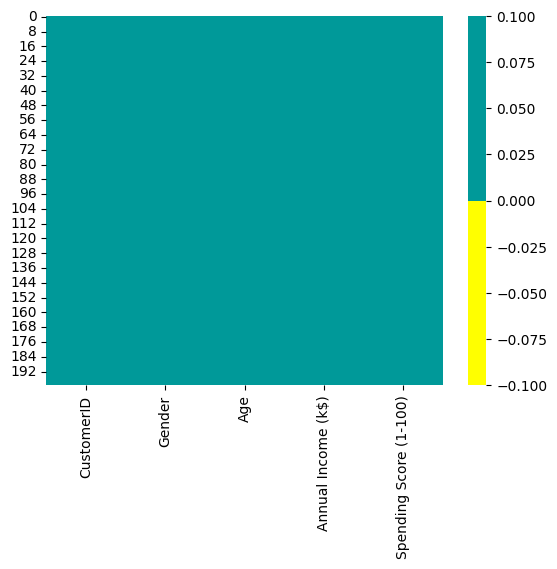

In [10]:
cols=table.columns
color=['#ffff00','#009999']
sns.heatmap(table[cols].isnull(),cmap=sns.color_palette(color))

In [11]:
table[table.duplicated()].shape

(0, 5)

In [28]:
table.groupby(["Gender"]).agg({"Age":["mean","min","max"]})

Age        
             mean min max
Gender                   
Female  38.098214  18  68
Male    39.806818  18  70

In [29]:
table.groupby(["Gender"]).agg({"Annual Income (k$)":["mean","min","max","sum"]})

Annual Income (k$)               
                     mean min  max   sum
Gender                                  
Female          59.250000  16  126  6636
Male            62.227273  15  137  5476

In [30]:
table.groupby(["Gender"]).agg({"Spending Score (1-100)":["mean","min","max","sum"]})

Spending Score (1-100)              
                         mean min max   sum
Gender                                     
Female              51.526786   5  99  5771
Male                48.511364   1  97  4269

# **STATISTICAL OVERVIEW**

In [12]:
table.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [22]:
# visualizing through axvline

Table1=table.copy()
X=Table1.drop(columns=["CustomerID","Gender","Annual Income (k$)","Spending Score (1-100)"])
Y=Table1[['Annual Income (k$)','Spending Score (1-100)']]


In [100]:
def dist_plot(x,y):
  fig=plt.figure(figsize=(15,5))
  ax=fig.add_subplot(121)
  sns.histplot(x,kde=True,ax=ax,color="darksalmon")
  ax.axvline(x.mean(),linestyle="-",color="red",linewidth=1.5)
  ax.axvline(x.median(),linestyle="--",color="blue",linewidth=1.5)
  ax.legend(labels=["kde","mean","median"])
  ax.set_title("KDE PLOT")
  ax2=fig.add_subplot(122)
  sns.boxplot(x,ax=ax2,color="palegreen")
  ax2.set_title("BPXPLOT")

  plt.show()

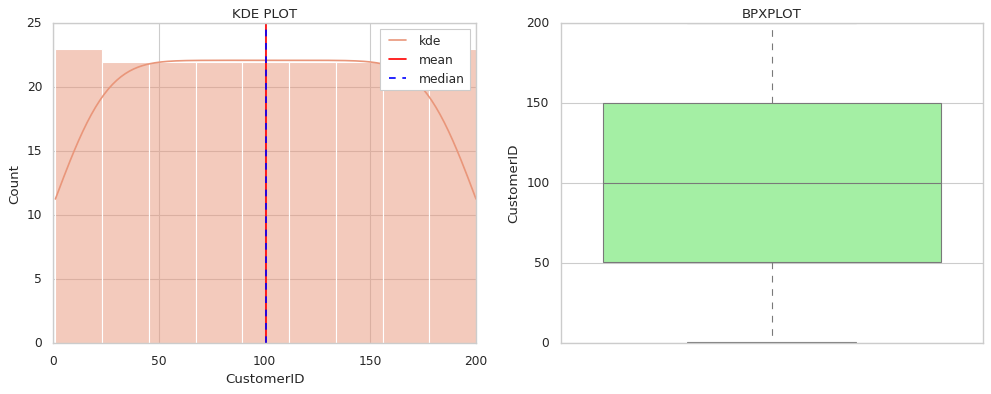

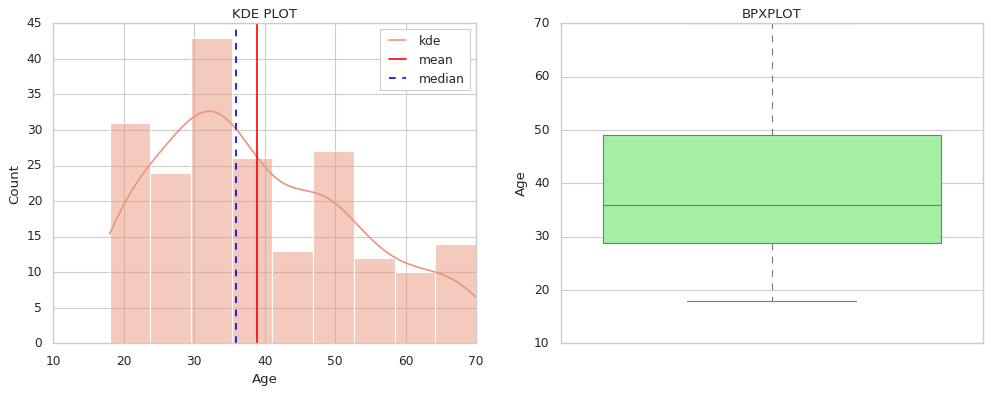

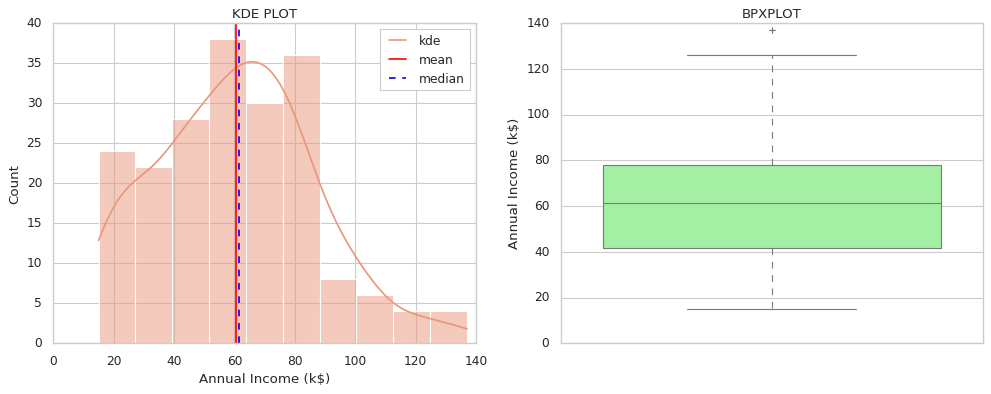

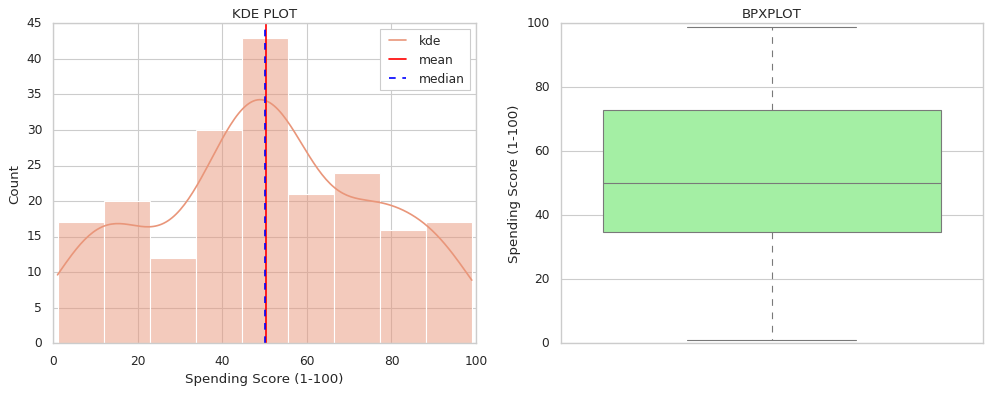

In [101]:
for i in list(table.select_dtypes(include=["number"]).columns):
  dist_plot(table[i],i)
  plt.show()

# **STATISTICAL INFERENCE:**
* customer_id column is having uniform data distribution
* **mean > median**  is the age column indicating that the data is positively skewed
* while annual income and spending score has the normal distribution as mean = median

# **DATA VISUALIZATION**

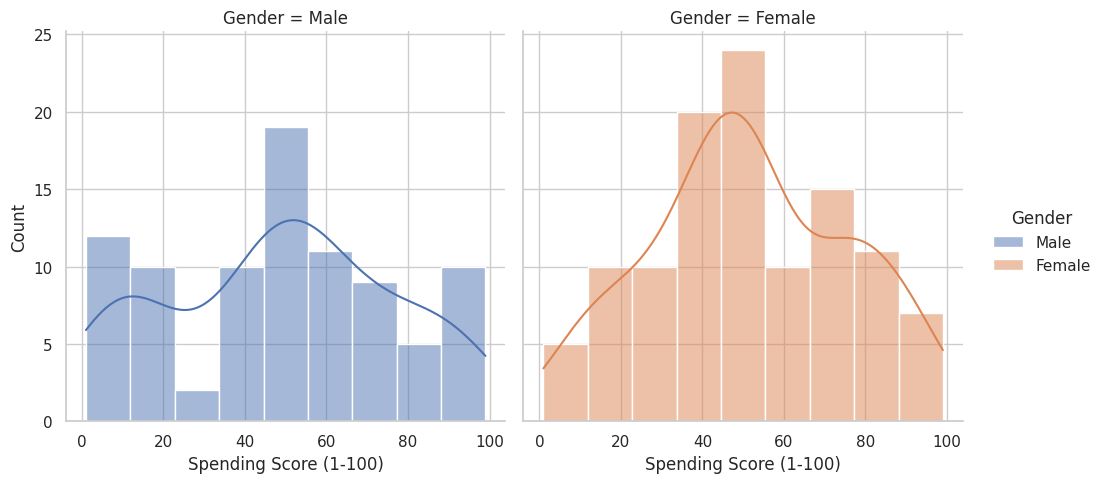

In [39]:
sns.displot(table,x="Annual Income (k$)",col="Gender",kde=True,hue="Gender")
plt.show()

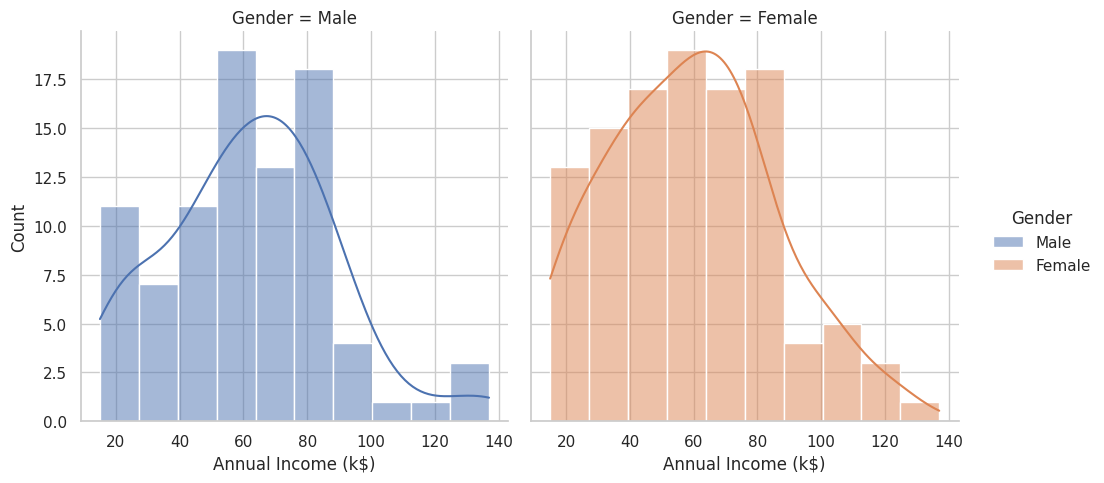

In [40]:
sns.displot(table,x="Annual Income (k$)",col="Gender",kde=True,hue="Gender")
plt.show()

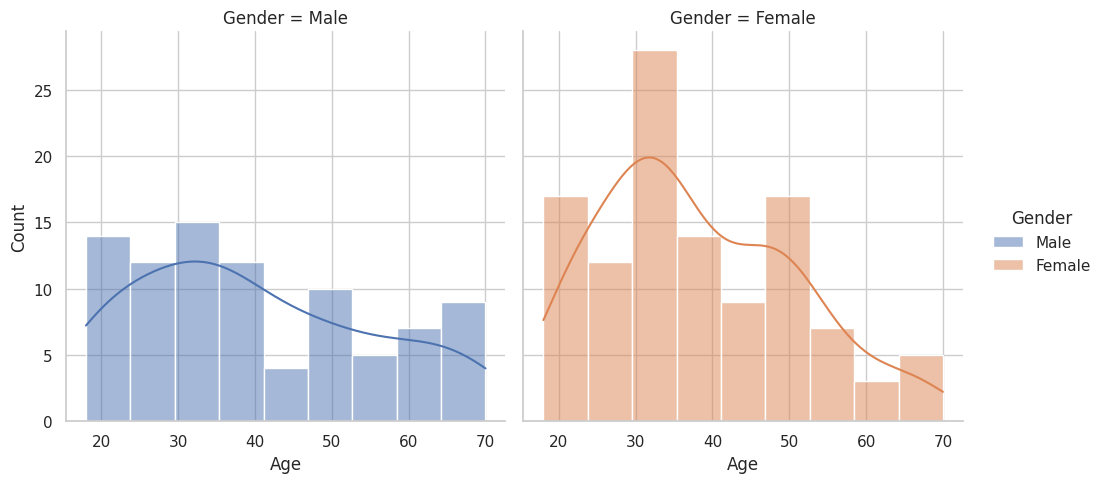

In [41]:
sns.displot(table,x="Age",col="Gender",kde=True,hue="Gender")
plt.show()

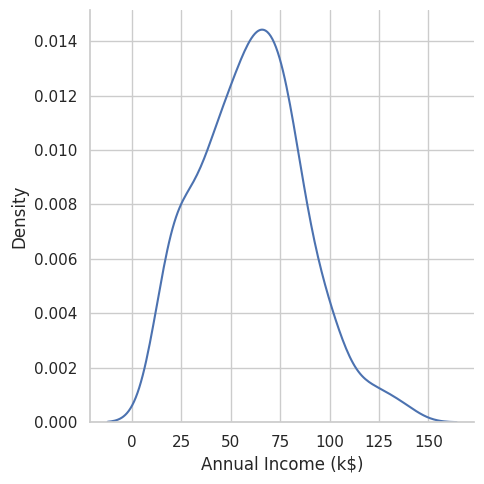

In [43]:
sns.displot(table,x="Annual Income (k$)",kind="kde")

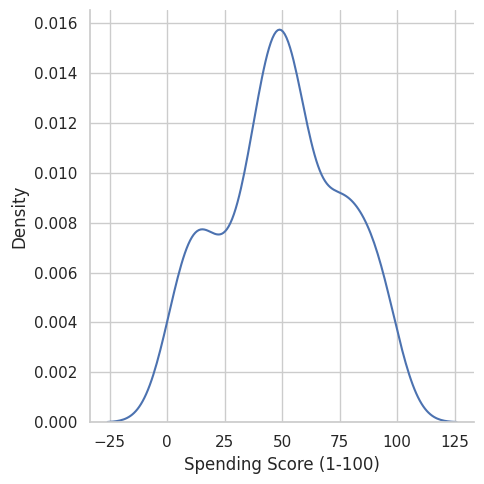

In [45]:
sns.displot(table,x="Spending Score (1-100)",kind="kde")

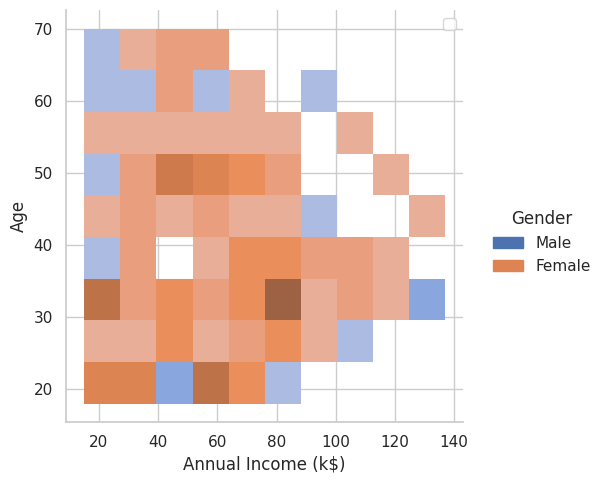

In [46]:
sns.displot(table,x="Annual Income (k$)",y="Age",hue="Gender")
plt.legend()
plt.show()

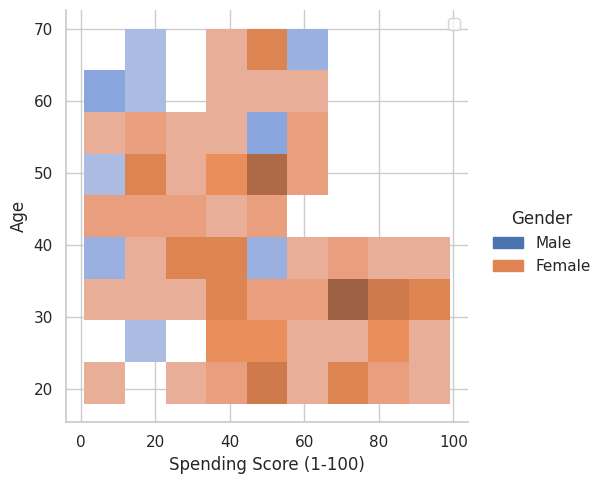

In [47]:
sns.displot(table,x="Spending Score (1-100)",y="Age",hue="Gender")
plt.legend()
plt.show()

# **INFERENCE**

* From the above observations , we can observe that Female Spending Score is more than the male spending score
* this is due to the annual income as female annual income is slightly greater than male annual income
* as the range of age is increasing , the annual income and spending score is decreasing
* Age group ranging between (25-35) in both male and female has the highest spending score and comparitively , female's spending score is more


# **DATA PREPROCESSING**

In [48]:
# removing the categorical data from the dataset using iloc function

data=table.iloc[:,[3,4]]


In [52]:
x=data.values

In [55]:
# standard scaler

from sklearn.preprocessing import StandardScaler
trans=StandardScaler()
scaled_data=pd.DataFrame(trans.fit_transform(data))
scaled_data.head()

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [56]:
# visualizing the effects of scaling

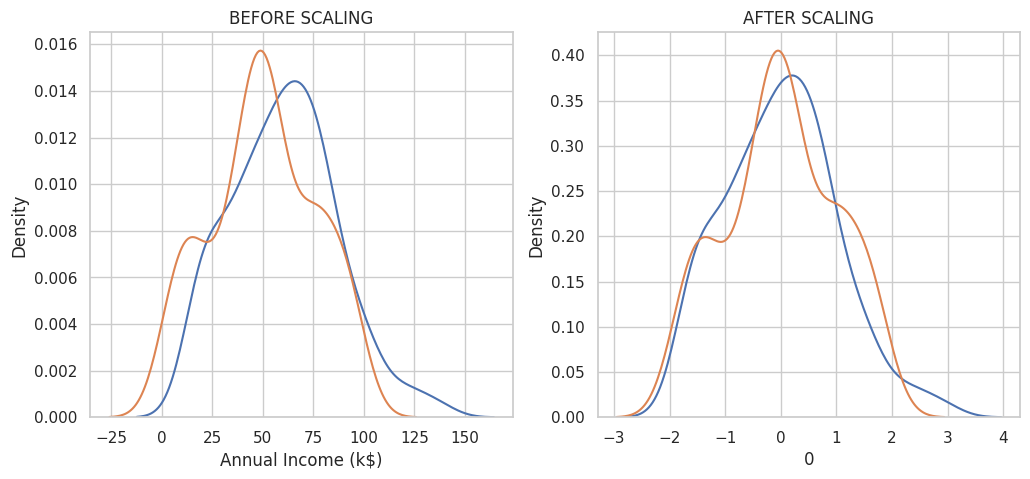

In [58]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(table["Annual Income (k$)"],ax=ax1)
sns.kdeplot(table["Spending Score (1-100)"],ax=ax1)
ax1.set_title("BEFORE SCALING")

sns.kdeplot(scaled_data[0],ax=ax2)
sns.kdeplot(scaled_data[1],ax=ax2)
ax2.set_title("AFTER SCALING")
plt.show()

# CLUSTERING MODELS

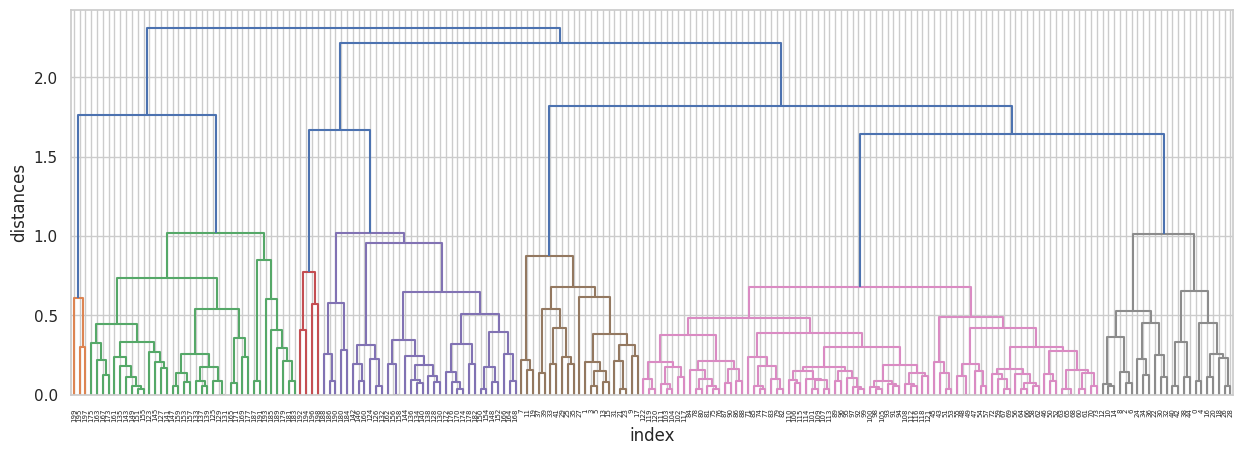

In [61]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
l=linkage(scaled_data,method="average",metric="euclidean")
plt.figure(figsize=(15,5))
plt.xlabel("index")
plt.ylabel("distances")
sch.dendrogram(
    l,
               )
plt.show()

In [63]:
from sklearn.cluster import AgglomerativeClustering
a=AgglomerativeClustering(n_clusters=7,linkage="average",metric="euclidean").fit(scaled_data)
cluster_labels=pd.Series(a.labels_)
Table1["Hierarchical_clustering"]=cluster_labels
Table1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Hierarchical_clustering
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,5
197,198,Male,32,126,74,4
198,199,Male,32,137,18,5


In [65]:
import sklearn
hierarchical_clustering=sklearn.metrics.silhouette_score(scaled_data,cluster_labels)
hierarchical_clustering

0.5392582863552982

In [67]:
table2=table.copy()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

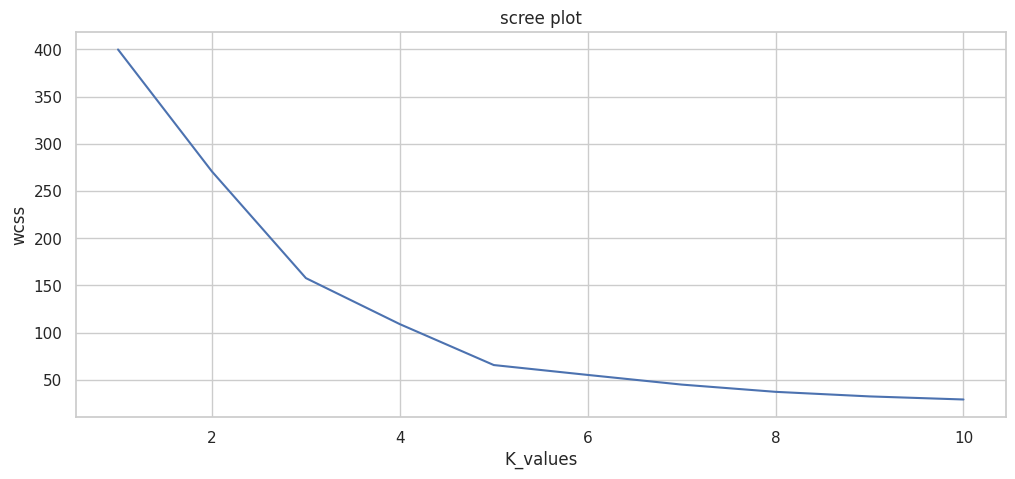

In [69]:
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(12,5))
wcss=[]
for i in range(1,11):
  clf=KMeans(n_clusters=i)
  clf.fit(scaled_data)
  wcss.append(clf.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel("K_values")
plt.ylabel("wcss")
plt.title("scree plot")
plt.show()

In [70]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=0)
Y=kmeans.fit_predict(x)
Y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [72]:
kmeans.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

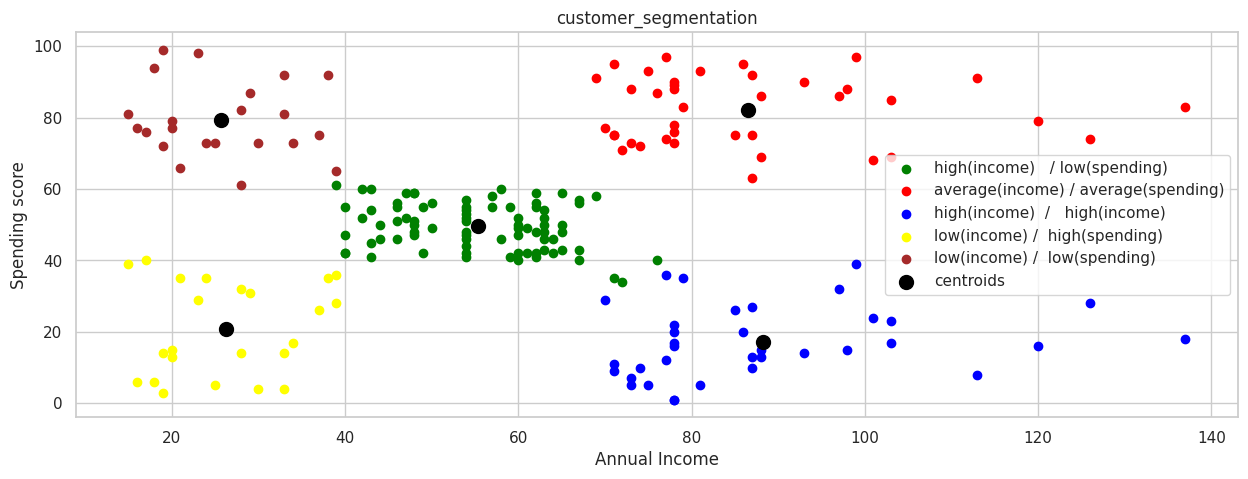

In [71]:
plt.figure(figsize=(15,5))
plt.scatter(x[Y==0,0],x[Y==0,1],c="green",label="high(income)   / low(spending)")
plt.scatter(x[Y==1,0],x[Y==1,1],c="red",label="average(income) / average(spending)")
plt.scatter(x[Y==2,0],x[Y==2,1],c="blue",label="high(income)  /   high(income)")
plt.scatter(x[Y==3,0],x[Y==3,1],c="yellow",label="low(income) /  high(spending)")
plt.scatter(x[Y==4,0],x[Y==4,1],c="brown",label="low(income) /  low(spending)")


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="centroids")
plt.title("customer_segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

# **INFERENCES:**

* customers with high income and but with low spending ratio belong to cluster 1
* customers with average income and average spending belong to cluster 2
* customers with high income and high spending belong to cluster 3
* customers with low income and high spending belong to cluster 4
* customers with low income and low spending belong to cluster 5

In [74]:
model=pd.Series(Y)
table2["K_means_clusters"]=model
table2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K_means_clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [77]:
# silhouette score
k_means_clustering=sklearn.metrics.silhouette_score(scaled_data,kmeans.labels_)
k_means_clustering

0.5546571631111091

In [79]:
# DBSCAN

table3=table.copy()

In [81]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=8)
nbrs=neigh.fit(scaled_data)
distances,indices=nbrs.kneighbors(scaled_data)

In [83]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]


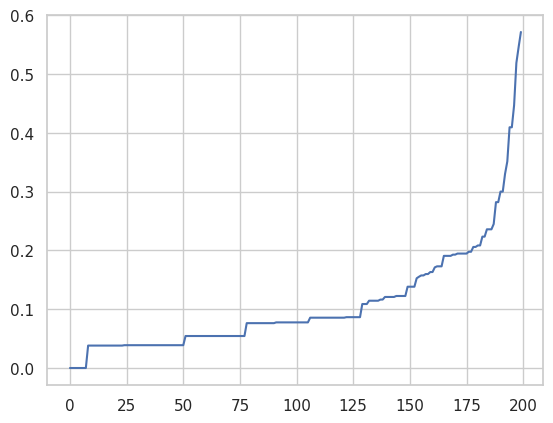

In [84]:
plt.plot(distances)

In [86]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.2,min_samples=5)
dbscan.fit(scaled_data)

DBSCAN(eps=0.2)

In [87]:
dbscan.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2,  5,  4,  5,  4,  5,
        2,  5,  4,  3,  2,  3,  2, -1,  2, -1,  4, -1, -1, -1, -1, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [89]:
db=pd.DataFrame(dbscan.labels_,columns=["dbscan_clusters"])
table4=pd.concat([table3,db],axis=1)
table4

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),dbscan_clusters
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

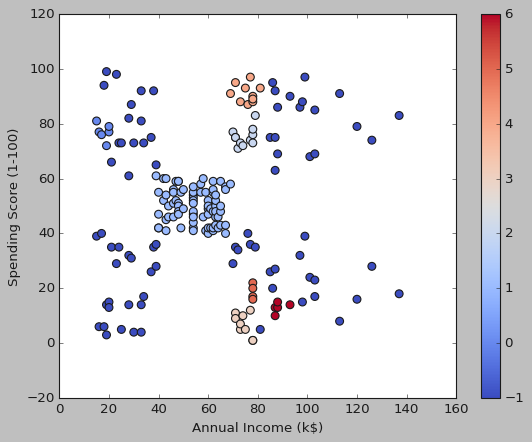

In [92]:
plt.style.use("classic")
table4.plot(x="Annual Income (k$)",y="Spending Score (1-100)",c=dbscan.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm)


In [93]:
db_scan=sklearn.metrics.silhouette_score(scaled_data,dbscan.labels_)
db_scan

0.14057942679617558

# **COMPARITIVE ANALYSIS**

In [94]:
report=pd.Series({"Hierarchical_clustering":hierarchical_clustering,"K_Means":k_means_clustering,"dbscan":db_scan})
report

,0
Hierarchical_clustering,0.539258
K_Means,0.554657
dbscan,0.140579


Text(0.5, 1.0, 'COMAPRITIVE ANALYSIS')

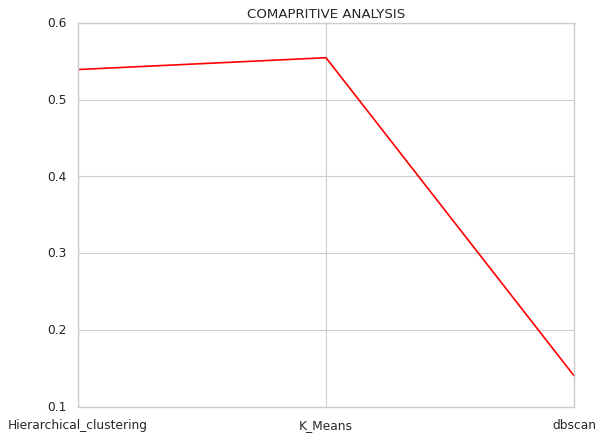

In [102]:
sns.set_theme(style="whitegrid")
plt.plot(report,color="red")
plt.title("COMAPRITIVE ANALYSIS")

# **INFERENCES :**

* As we compare the silhouette scores , K-means clustering has proven to be the best clustering model in segmenting the clusters without any overlapping clusters
* The silhouette scores of hierarchical clustering and K_means clustering is above 0.5 indicating it as the good models
* comparitively , K_means clustering  silhouette score is slightly higher than 0.5 making it the best model among the other two models